**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN3**<br>
**Name: "testing_regress_ML_sl.ipynb"**<br>

**Description:**<br> 
**1. Training and testing Machine Learning algorithms for regression purposes**<br>
**2. Assessing the accuracy of those algorithms using various metrics**


**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**1. QS -> Quark Star**<br>

## **1. Importing and pre-processing data**

In [1]:
# Numpy module import
import numpy as np

# The plotting module matplotlib
import matplotlib.pyplot as plt

# Module for data importation and presentaion
import pandas as pd
from pandas import DataFrame

# Module for detecting and imputing missing data
import missingno as msno

# ML package for splitting the dataframe into train and test set
from sklearn.model_selection import train_test_split

# ML package for data scalling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the NS EOS data
df_NS_EOS=pd.read_csv("NS_reg_data_s100.csv",header=0)
df_QS_EOS=pd.read_csv("QS_reg_data_s100.csv",header=0)


# Showing the data
display(df_NS_EOS)
display(df_QS_EOS)

,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800),E_c(10),E_c(50),E_c(100),E_c(200),...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.753574,5.201326,5.005939,4.745018,5.516383,5.673930,5.226697,5.228142,5.349768,5.544603
1,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.347856,5.708800,5.504252,5.749450,5.847573,5.253151,5.502099,4.904455,4.842121,6.244266
2,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.778406,5.112040,5.903120,4.785401,6.164629,4.793833,5.621854,5.382842,6.248591,6.523238
3,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.319544,5.963362,6.069765,6.307773,5.304597,5.883870,5.609749,5.271895,5.286438,6.275376
4,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,6.316146,5.201160,5.178831,5.592731,5.716380,5.618333,5.220385,5.109423,5.654206,5.374555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30395,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,14.075877,14.252338,13.513203,13.297990,14.016192,15.125043,14.000791,10.583277,12.872427,11.918547
30396,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,13.757765,12.868918,13.843855,14.511371,14.320687,13.021047,14.242380,11.436195,11.578946,11.116674
30397,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,12.976988,13.521614,13.603322,13.717729,14.727811,13.800575,14.189480,11.893311,11.038610,11.710286
30398,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,13.202122,13.148827,13.647112,13.870894,14.292080,14.119637,13.536594,11.515037,11.894190,11.395147


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800),E_c(10),E_c(50),E_c(100),E_c(200),...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,8.959457,11.593229,9.949707,9.798504,11.455198,11.904947,11.166535,10.360262,9.755393,8.570276
1,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.145178,10.002327,10.165674,10.128378,10.965964,11.207054,10.522203,10.651441,10.042306,9.033370
2,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.071756,10.887648,10.392673,9.414304,11.013888,11.200908,11.262729,9.495874,10.924364,9.373154
3,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.207095,9.561412,9.798905,9.385573,11.528692,10.308981,11.667502,9.857490,9.562289,9.145917
4,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.246473,10.521009,9.987907,10.562971,11.685060,11.004861,11.205870,10.217271,10.568746,9.229139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.794135,6.950967,7.893483,6.858629,7.959357,7.408271,7.237478,7.994082,7.288438,7.740238
50996,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,6.446645,6.416716,7.129269,7.018295,7.448407,7.250506,8.161290,7.457228,7.495652,8.300280
50997,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.230943,6.526717,7.581066,6.843901,7.290284,7.577865,7.073089,7.289872,7.465370,7.966188
50998,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.798161,6.962729,7.607580,7.389814,7.936254,7.647956,7.481916,7.058072,7.358002,7.308888


In [3]:
# Getting the first 6 columns and all rows (regression output columns)
NS_EOS_regY = df_NS_EOS.iloc[:,6:12]
QS_EOS_regY = df_QS_EOS.iloc[:,6:12]
# Getting the rest column and all rows (all explanatory variables columns)
NS_EOS_regX = df_NS_EOS.iloc[:,12:]
QS_EOS_regX = df_QS_EOS.iloc[:,12:]

In [4]:
# Showing the head of the X vector table of values
NS_EOS_regX.head()

,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,0.409994,0.400979,0.304677,0.475179,0.326941,0.343041,0.839699,0.389780,0.628067,0.566439,...,5.753574,5.201326,5.005939,4.745018,5.516383,5.673930,5.226697,5.228142,5.349768,5.544603
1,0.212808,0.223173,0.258963,0.428439,0.440610,0.417531,0.520423,0.529855,0.681713,0.605906,...,5.347856,5.708800,5.504252,5.749450,5.847573,5.253151,5.502099,4.904455,4.842121,6.244266
2,0.303692,0.424015,0.356126,0.486326,0.411779,0.481431,0.531765,0.536935,0.475472,0.845495,...,5.778406,5.112040,5.903120,4.785401,6.164629,4.793833,5.621854,5.382842,6.248591,6.523238
3,0.343276,0.287816,0.207954,0.287159,0.553131,0.395827,0.570124,0.714203,0.387177,0.893604,...,5.319544,5.963362,6.069765,6.307773,5.304597,5.883870,5.609749,5.271895,5.286438,6.275376
4,0.168321,0.569217,0.247429,0.478765,0.460125,0.552871,0.709566,0.325587,0.560728,0.671290,...,6.316146,5.201160,5.178831,5.592731,5.716380,5.618333,5.220385,5.109423,5.654206,5.374555


In [5]:
# Showing the head of the X vector table of values
QS_EOS_regX.head()

,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,0.292028,0.692718,0.304095,0.815969,0.572874,0.888877,1.163570,1.035494,0.962414,1.688320,...,8.959457,11.593229,9.949707,9.798504,11.455198,11.904947,11.166535,10.360262,9.755393,8.570276
1,0.301488,0.554567,0.260817,0.881757,0.502825,0.973429,1.188240,0.851487,1.175474,1.622734,...,9.145178,10.002327,10.165674,10.128378,10.965964,11.207054,10.522203,10.651441,10.042306,9.033370
2,0.373002,0.330130,0.422954,0.869509,0.388347,0.766375,1.024913,1.139727,1.030898,1.460734,...,9.071756,10.887648,10.392673,9.414304,11.013888,11.200908,11.262729,9.495874,10.924364,9.373154
3,0.431373,0.324176,0.275265,0.725748,0.591206,0.979374,1.112319,0.999412,0.993123,1.672784,...,9.207095,9.561412,9.798905,9.385573,11.528692,10.308981,11.667502,9.857490,9.562289,9.145917
4,0.622437,0.631083,0.136402,0.830874,0.513875,0.811358,1.220414,1.129613,0.949157,1.598523,...,9.246473,10.521009,9.987907,10.562971,11.685060,11.004861,11.205870,10.217271,10.568746,9.229139


In [6]:
# Showing the head of the Y vector table of values
NS_EOS_regY.head()

,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
0,864.635734,1304.614162,1564.969658,1888.099482,2299.394197,2842.561657
1,864.635734,1304.614162,1564.969658,1888.099482,2299.394197,2842.561657
2,864.635734,1304.614162,1564.969658,1888.099482,2299.394197,2842.561657
3,864.635734,1304.614162,1564.969658,1888.099482,2299.394197,2842.561657
4,864.635734,1304.614162,1564.969658,1888.099482,2299.394197,2842.561657


In [7]:
# Showing the head of the Y vector table of values
QS_EOS_regY.head()

,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
0,268.386875,387.975469,537.556395,836.882428,1435.850146,2634.322373
1,268.386875,387.975469,537.556395,836.882428,1435.850146,2634.322373
2,268.386875,387.975469,537.556395,836.882428,1435.850146,2634.322373
3,268.386875,387.975469,537.556395,836.882428,1435.850146,2634.322373
4,268.386875,387.975469,537.556395,836.882428,1435.850146,2634.322373


In [8]:
# Splitting the data into test and training sets
# test_size = 0.25, the percentage of the test size to the complete dataset (here we choose 25%)
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.

# Splitting the all explanatory quantities data set
NS_EOS_regX_train, NS_EOS_regX_test, NS_EOS_regY_train, NS_EOS_regY_test = train_test_split(NS_EOS_regX, NS_EOS_regY, test_size = 0.25, random_state = 45)
QS_EOS_regX_train, QS_EOS_regX_test, QS_EOS_regY_train, QS_EOS_regY_test = train_test_split(QS_EOS_regX, QS_EOS_regY, test_size = 0.25, random_state = 45)

In [9]:
 # Definition of scaler
# scaler = MinMaxScaler()

# # Applying feature scaling on all explanatory quantities train and test sets
# NS_EOS_regX_train_scaled = scaler.fit_transform(NS_EOS_regX_train)
# #NS_EOS_regY_train_scaled = scaler.fit_transform(NS_EOS_regY_train)
# NS_EOS_regX_test_scaled =scaler.transform(NS_EOS_regX_test)
# #NS_EOS_regY_test_scaled =scaler.transform(NS_EOS_regY_test)

In [10]:
# NS_EOS_regX_train_scaled

In [11]:
# NS_EOS_regX_test_scaled

## **2. Testing ML regression algorithms**

In [12]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

**Decision Tree**

In [13]:
# Multiple output Decision tree regressor Neutron Star
regr_multidtree_NS = DecisionTreeRegressor(max_depth=10000,criterion="squared_error")
regr_multidtree_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

DecisionTreeRegressor(max_depth=10000)

In [14]:
# Multiple output Decision tree regressor Quark Star
regr_multidtree_QS = DecisionTreeRegressor(max_depth=10000,criterion="squared_error")
regr_multidtree_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

DecisionTreeRegressor(max_depth=10000)

In [15]:
NS_EOS_regY_predict_dtree = regr_multidtree_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_dtree)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 229.67495356,  362.52528897,  450.59969205,  695.82283945,
         968.08021185, 1368.08021185],
       [ 431.41527798,  934.33096494, 1195.68522405, 1543.47293033,
        2018.66192987, 2691.37044809],
       [ 356.34889494,  597.56702635,  874.37671498, 1295.13405271,
        1948.75342995, 2990.26810541],
       ...,
       [ 367.02296292,  596.07787955,  725.37060722,  950.91364451,
        1272.08401237, 1750.74121444],
       [ 322.36674727,  567.68950411,  730.71809772,  896.00159037,
        1120.61175687, 1520.61175687],
       [ 266.39310789,  410.03277993,  585.71025658,  846.3153418 ,
        1140.29840899, 1584.75055958]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,404.505879,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,931.128921,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,776.238069,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,552.477559,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,510.689681,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...
22529,229.674954,519.744652,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,664.603859,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,665.941597,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,514.493553,747.590727,916.066641,1143.951321,1543.951321


In [16]:
QS_EOS_regY_predict_dtree = regr_multidtree_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_dtree)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[ 292.26060944,  408.03845397,  553.65940854,  846.52677427,
        1435.49308609, 2619.05627591],
       [ 160.62151087,  223.05503024,  308.14458805,  494.54090464,
         906.89173994, 1813.26521949],
       [ 504.10682769,  587.28204108,  694.70287279,  918.15620595,
        1387.92322844, 2378.73215695],
       ...,
       [ 157.98002106,  218.02067347,  299.82824958,  479.41885701,
         878.64874507, 1761.95986162],
       [ 308.40957073,  404.75962058,  529.12125216,  785.86905801,
        1316.93310094, 2412.05929532],
       [ 434.73239687,  542.07688512,  678.16422269,  954.40067159,
        1516.08811384, 2657.2944204 ]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
4484,292.260609,408.038454,553.659409,846.526774,1435.493086,2619.056276
3943,160.621511,223.055030,308.144588,494.540905,906.891740,1813.265219
46761,544.141070,615.496073,707.926847,901.531878,1314.221353,2202.890529
5042,234.342556,331.874739,458.285849,719.512465,1259.088001,2368.622630
49298,612.123005,687.295412,784.261036,986.286652,1413.892326,2327.516212
...,...,...,...,...,...,...
32199,435.513310,525.727642,642.039217,882.895189,1384.881969,2431.090894
1778,151.010613,215.293810,303.207014,495.805033,920.496682,1848.846392
4038,157.980021,218.020673,299.828250,479.418857,878.648745,1761.959862
17495,349.353181,452.728394,584.723573,854.374979,1406.042026,2532.553670


In [19]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_dtree_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="raw_values")
MSLE_dtree_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="uniform_average")
MSE_dtree_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="raw_values")
MSE_dtree_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_dtree_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_dtree_NS_avg)
print("Mean squared error (raw values):")
print(MSE_dtree_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_dtree_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.01252751 0.00764951 0.00642371 0.00406752 0.00427599 0.01038881]
Mean squared log error (uniform average):
0.007555508818176369
Mean squared error (raw values):
[ 1565.01483199  2788.07587773  3710.14242226  3801.35060398
  6990.371275   42476.05744083]
Mean squared error (uniform average):
10221.835408632804


In [20]:
print("QUARK STARS results:\n")
MSLE_dtree_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="raw_values")
MSLE_dtree_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="uniform_average")
MSE_dtree_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="raw_values")
MSE_dtree_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_dtree_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_dtree_QS_avg)
print("Mean squared error (raw values):")
print(MSE_dtree_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_dtree_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00923924 0.00415364 0.00226097 0.00214304 0.00329369 0.00397856]
Mean squared log error (uniform average):
0.00417818982697988
Mean squared error (raw values):
[ 1656.23488356  1156.32627266   908.19546571  1466.14298388
  5709.68014733 22014.10616326]
Mean squared error (uniform average):
5485.114319400745


**Gradient Boosting**

In [21]:
# Multiple output Gradient Boosting regressor Neutron Star
regr_multigradboost_NS = MultiOutputRegressor(GradientBoostingRegressor(loss="squared_error",n_estimators=100,criterion="squared_error"))
regr_multigradboost_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(criterion='squared_error'))

In [22]:
# Multiple output Gradient Boosting regressor Quark Star
regr_multigradboost_QS = MultiOutputRegressor(GradientBoostingRegressor(loss="squared_error",n_estimators=100,criterion="squared_error"))
regr_multigradboost_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(criterion='squared_error'))

In [23]:
NS_EOS_regY_predict_gradboost = regr_multigradboost_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_gradboost)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 209.44187348,  368.15607403,  488.58786138,  720.58122114,
         969.35101603, 1481.27886447],
       [ 474.28884055,  924.34255292, 1217.95285875, 1550.28365184,
        2013.41720121, 2708.07030963],
       [ 376.3087146 ,  709.99276625,  857.98822935, 1236.6339948 ,
        1700.43060963, 2387.9676646 ],
       ...,
       [ 372.94073907,  630.77019909,  791.97410101, 1042.5490404 ,
        1353.12815894, 1846.53174581],
       [ 270.99623009,  551.75525531,  701.47866998,  929.11985516,
        1227.80461396, 1662.04695913],
       [ 268.10853885,  424.38435177,  579.94716349,  828.25999147,
        1121.342834  , 1630.09569133]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,404.505879,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,931.128921,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,776.238069,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,552.477559,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,510.689681,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...
22529,229.674954,519.744652,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,664.603859,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,665.941597,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,514.493553,747.590727,916.066641,1143.951321,1543.951321


In [24]:
QS_EOS_regY_predict_gradboost = regr_multigradboost_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_gradboost)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[ 333.95959774,  415.31033841,  548.89755154,  843.87307829,
        1376.87821608, 2478.39143837],
       [ 157.81357421,  217.82139397,  303.60092777,  489.45018911,
         895.26338381, 1802.80682256],
       [ 538.77515389,  617.93291329,  728.90620689,  919.06057139,
        1381.26120993, 2341.33259795],
       ...,
       [ 169.06860785,  224.51379275,  308.33044847,  479.80694037,
         872.9213661 , 1761.55817657],
       [ 342.08753306,  444.26690091,  575.10936854,  831.53080472,
        1374.93033091, 2482.93824156],
       [ 461.38566276,  552.24818713,  702.51977006,  972.31788658,
        1530.14378838, 2605.7758988 ]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
4484,292.260609,408.038454,553.659409,846.526774,1435.493086,2619.056276
3943,160.621511,223.055030,308.144588,494.540905,906.891740,1813.265219
46761,544.141070,615.496073,707.926847,901.531878,1314.221353,2202.890529
5042,234.342556,331.874739,458.285849,719.512465,1259.088001,2368.622630
49298,612.123005,687.295412,784.261036,986.286652,1413.892326,2327.516212
...,...,...,...,...,...,...
32199,435.513310,525.727642,642.039217,882.895189,1384.881969,2431.090894
1778,151.010613,215.293810,303.207014,495.805033,920.496682,1848.846392
4038,157.980021,218.020673,299.828250,479.418857,878.648745,1761.959862
17495,349.353181,452.728394,584.723573,854.374979,1406.042026,2532.553670


In [27]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_gradboost_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSLE_gradboost_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="uniform_average")
MSE_gradboost_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSE_gradboost_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_gradboost_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_gradboost_NS_avg)
print("Mean squared error (raw values):")
print(MSE_gradboost_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_gradboost_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.00302562 0.00298231 0.00338272 0.0020209  0.00251619 0.00814353]
Mean squared log error (uniform average):
0.0036785469775208763
Mean squared error (raw values):
[  374.69626174  1038.84749974  1794.65511789  1791.5728369
  4012.93978352 35077.29017204]
Mean squared error (uniform average):
7348.333611970847


In [28]:
print("QUARK STARS results:\n")
MSLE_gradboost_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSLE_gradboost_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="uniform_average")
MSE_gradboost_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSE_gradboost_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_gradboost_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_gradboost_QS_avg)
print("Mean squared error (raw values):")
print(MSE_gradboost_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_gradboost_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00283577 0.00111004 0.00078711 0.0010574  0.00183639 0.00223337]
Mean squared log error (uniform average):
0.0016433458719930568
Mean squared error (raw values):
[  491.6831959    303.41814856   275.69848872   654.67371636
  3027.57030431 11929.66345366]
Mean squared error (uniform average):
2780.4512179162557


**SVR**

In [29]:
# Multiple output SVR regresssor Neutron Star
regr_multiSVR_NS = MultiOutputRegressor(SVR(kernel="rbf", C=1.0, epsilon=0.1))
regr_multiSVR_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

MultiOutputRegressor(estimator=SVR())

In [30]:
# Multiple output SVR regresssor Quark Star
regr_multiSVR_QS = MultiOutputRegressor(SVR(kernel="rbf", C=1.0, epsilon=0.1))
regr_multiSVR_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

MultiOutputRegressor(estimator=SVR())

In [31]:
NS_EOS_regY_predict_SVR = regr_multiSVR_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_SVR)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 213.5303035 ,  369.58259073,  478.98403424,  640.89953964,
         856.4513123 , 1257.40806199],
       [ 456.3977436 ,  876.46116771, 1098.06078289, 1359.96952108,
        1689.6795567 , 2140.47558886],
       [ 384.25422492,  704.2827202 ,  887.18819221, 1126.76043041,
        1450.61297419, 1905.42941258],
       ...,
       [ 372.85199997,  675.82552753,  865.95157509, 1108.04870362,
        1434.27993526, 1894.74953536],
       [ 262.39924994,  527.92968562,  682.00597958,  881.88548076,
        1141.22804064, 1555.50672488],
       [ 256.32902685,  424.62606574,  539.89105997,  716.65326617,
         964.913864  , 1382.53898708]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,404.505879,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,931.128921,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,776.238069,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,552.477559,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,510.689681,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...
22529,229.674954,519.744652,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,664.603859,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,665.941597,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,514.493553,747.590727,916.066641,1143.951321,1543.951321


In [32]:
QS_EOS_regY_predict_SVR = regr_multiSVR_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_SVR)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[ 318.92782476,  411.08624923,  527.15316545,  761.86727495,
        1258.34798511, 2291.93507632],
       [ 156.34114938,  217.20198317,  305.906079  ,  497.66872857,
         917.30781925, 1841.85696163],
       [ 520.44973042,  601.98143563,  711.861011  ,  944.33837813,
        1427.62775187, 2439.67226234],
       ...,
       [ 158.20943739,  221.40657174,  310.01186327,  504.66814835,
         926.18586787, 1854.21615617],
       [ 364.00822969,  456.65474271,  577.97894199,  829.11248716,
        1335.29165023, 2371.41092185],
       [ 482.9976749 ,  575.52473154,  699.41986444,  947.50163901,
        1443.66727716, 2463.75399721]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
4484,292.260609,408.038454,553.659409,846.526774,1435.493086,2619.056276
3943,160.621511,223.055030,308.144588,494.540905,906.891740,1813.265219
46761,544.141070,615.496073,707.926847,901.531878,1314.221353,2202.890529
5042,234.342556,331.874739,458.285849,719.512465,1259.088001,2368.622630
49298,612.123005,687.295412,784.261036,986.286652,1413.892326,2327.516212
...,...,...,...,...,...,...
32199,435.513310,525.727642,642.039217,882.895189,1384.881969,2431.090894
1778,151.010613,215.293810,303.207014,495.805033,920.496682,1848.846392
4038,157.980021,218.020673,299.828250,479.418857,878.648745,1761.959862
17495,349.353181,452.728394,584.723573,854.374979,1406.042026,2532.553670


In [33]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_SVR_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="raw_values")
MSLE_SVR_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="uniform_average")
MSE_SVR_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="raw_values")
MSE_SVR_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_SVR_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_SVR_NS_avg)
print("Mean squared error (raw values):")
print(MSE_SVR_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_SVR_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.00733256 0.00573241 0.0094073  0.01263363 0.02077411 0.03552479]
Mean squared log error (uniform average):
0.015234132955585436
Mean squared error (raw values):
[  1405.47218802   2531.55031182   5537.23215102  11450.43985859
  35170.0179878  140834.95968828]
Mean squared error (uniform average):
32821.61203091943


In [34]:
print("QUARK STARS results:\n")
MSLE_SVR_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="raw_values")
MSLE_SVR_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="uniform_average")
MSE_SVR_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="raw_values")
MSE_SVR_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_SVR_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_SVR_QS_avg)
print("Mean squared error (raw values):")
print(MSE_SVR_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_SVR_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00341762 0.00125185 0.00131258 0.00303087 0.00518086 0.00591217]
Mean squared log error (uniform average):
0.0033509934586965135
Mean squared error (raw values):
[  618.61599627   371.72923341   437.82549094  1804.35438702
  8390.1189015  31555.48565196]
Mean squared error (uniform average):
7196.35494351712


**Random Forest**

In [35]:
# Random Forest regressor Neutron Star
max_depth = 3000
regr_rf_NS = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
regr_rf_NS.fit(NS_EOS_regX_train, NS_EOS_regY_train)

RandomForestRegressor(max_depth=3000, random_state=0)

In [36]:
# Random Forest regressor Quark Star
max_depth = 3000
regr_rf_QS = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
regr_rf_QS.fit(QS_EOS_regX_train, QS_EOS_regY_train)

RandomForestRegressor(max_depth=3000, random_state=0)

In [37]:
NS_EOS_regY_predict_RF = regr_rf_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_RF)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 216.96194951,  374.5232246 ,  482.08292139,  710.74150894,
         992.5940966 , 1448.95349716],
       [ 451.81125786,  933.50808772, 1193.09414732, 1538.25996566,
        2009.57692295, 2676.54983857],
       [ 372.51536611,  731.65789901,  954.19050997, 1257.13659472,
        1694.1358113 , 2348.06039604],
       ...,
       [ 368.26672284,  641.73446122,  837.34608126, 1035.71396952,
        1310.57779675, 1743.03852159],
       [ 276.8775537 ,  559.53308129,  760.87576658,  945.7483324 ,
        1203.6823431 , 1638.86806475],
       [ 245.73663586,  430.75311753,  601.31396908,  841.26525814,
        1139.04301687, 1612.46811514]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,404.505879,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,931.128921,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,776.238069,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,552.477559,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,510.689681,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...
22529,229.674954,519.744652,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,664.603859,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,665.941597,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,514.493553,747.590727,916.066641,1143.951321,1543.951321


In [39]:
QS_EOS_regY_predict_RF = regr_rf_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_RF)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[ 325.92172404,  430.20823436,  562.61482791,  831.91290227,
        1381.1658636 , 2501.49650839],
       [ 160.59509597,  223.00468668,  308.06142467,  494.38968416,
         906.60930999, 1812.75216591],
       [ 514.50343404,  591.47260018,  691.0160826 ,  898.76414053,
        1338.45760005, 2275.40315382],
       ...,
       [ 158.16591371,  218.27473048,  300.16961728,  479.9270222 ,
         879.44862126, 1763.22721198],
       [ 333.4543451 ,  438.04479424,  571.195316  ,  842.50478331,
        1396.31677511, 2525.44715932],
       [ 477.30224317,  577.80050815,  705.60121091,  966.28043121,
        1500.33019332, 2595.53154699]])

True values:


,E_c(10),E_c(50),E_c(100),E_c(200),E_c(400),E_c(800)
4484,292.260609,408.038454,553.659409,846.526774,1435.493086,2619.056276
3943,160.621511,223.055030,308.144588,494.540905,906.891740,1813.265219
46761,544.141070,615.496073,707.926847,901.531878,1314.221353,2202.890529
5042,234.342556,331.874739,458.285849,719.512465,1259.088001,2368.622630
49298,612.123005,687.295412,784.261036,986.286652,1413.892326,2327.516212
...,...,...,...,...,...,...
32199,435.513310,525.727642,642.039217,882.895189,1384.881969,2431.090894
1778,151.010613,215.293810,303.207014,495.805033,920.496682,1848.846392
4038,157.980021,218.020673,299.828250,479.418857,878.648745,1761.959862
17495,349.353181,452.728394,584.723573,854.374979,1406.042026,2532.553670


In [40]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_RF_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="raw_values")
MSLE_RF_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="uniform_average")
MSE_RF_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="raw_values")
MSE_RF_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_RF_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_RF_NS_avg)
print("Mean squared error (raw values):")
print(MSE_RF_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_RF_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.00396364 0.00252655 0.0023062  0.00138385 0.00161148 0.00466392]
Mean squared log error (uniform average):
0.002742608267533988
Mean squared error (raw values):
[  498.45516689   897.33439064  1306.05326482  1278.77163547
  2648.77394148 20662.83615988]
Mean squared error (uniform average):
4548.704093197503


In [41]:
print("QUARK STARS results:\n")
MSLE_RF_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="raw_values")
MSLE_RF_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="uniform_average")
MSE_RF_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="raw_values")
MSE_RF_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_RF_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_RF_QS_avg)
print("Mean squared error (raw values):")
print(MSE_RF_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_RF_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.0028366  0.00116903 0.00064873 0.00079209 0.00135165 0.00165434]
Mean squared log error (uniform average):
0.0014087383804267347
Mean squared error (raw values):
[ 535.41250827  346.84599069  267.17480774  540.7876628  2366.9999979
 9212.74964719]
Mean squared error (uniform average):
2211.661769097591


## **3. Summary**

### **3.1 Printing metrics results**

In [42]:
# Printing results for Neutron Stars data
print("NEUTRON STARS (polytropic):")

# Printing the MSLE (raw values) results:
print("\n>> MSLE (raw values)")
print("Decision Tree:", MSLE_dtree_NS_raw)
print("Gradient Boosting:", MSLE_gradboost_NS_raw)
print("SVR:", MSLE_SVR_NS_raw)
print("Random Forest:", MSLE_RF_NS_raw)

# Printing the MSLE (uniform average) results:
print("\n>> MSLE (uniform average)")
print("Decision Tree:", MSLE_dtree_NS_avg)
print("Gradient Boosting:", MSLE_gradboost_NS_avg)
print("SVR:", MSLE_SVR_NS_avg)
print("Random Forest:", MSLE_RF_NS_avg)

# Printing the MSE (raw values) results:
print("\n>> MSE (raw values)")
print("Decision Tree:", MSE_dtree_NS_raw)
print("Gradient Boosting:", MSE_gradboost_NS_raw)
print("SVR:", MSE_SVR_NS_raw)
print("Random Forest:", MSE_RF_NS_raw)

# Printing the MSE (uniform average) results:
print("\n>> MSE (uniform average)")
print("Decision Tree:", MSE_dtree_NS_avg)
print("Gradient Boosting:", MSE_gradboost_NS_avg)
print("SVR:", MSE_SVR_NS_avg)
print("Random Forest:", MSE_RF_NS_avg)

NEUTRON STARS (polytropic):

>> MSLE (raw values)
Decision Tree: [0.01252751 0.00764951 0.00642371 0.00406752 0.00427599 0.01038881]
Gradient Boosting: [0.00302562 0.00298231 0.00338272 0.0020209  0.00251619 0.00814353]
SVR: [0.00733256 0.00573241 0.0094073  0.01263363 0.02077411 0.03552479]
Random Forest: [0.00396364 0.00252655 0.0023062  0.00138385 0.00161148 0.00466392]

>> MSLE (uniform average)
Decision Tree: 0.007555508818176369
Gradient Boosting: 0.0036785469775208763
SVR: 0.015234132955585436
Random Forest: 0.002742608267533988

>> MSE (raw values)
Decision Tree: [ 1565.01483199  2788.07587773  3710.14242226  3801.35060398
  6990.371275   42476.05744083]
Gradient Boosting: [  374.69626174  1038.84749974  1794.65511789  1791.5728369
  4012.93978352 35077.29017204]
SVR: [  1405.47218802   2531.55031182   5537.23215102  11450.43985859
  35170.0179878  140834.95968828]
Random Forest: [  498.45516689   897.33439064  1306.05326482  1278.77163547
  2648.77394148 20662.83615988]

>> MS

In [43]:
# Printing results for Neutron Stars data
print("QUARK STARS (cfl):")

# Printing the MSLE (raw values) results:
print("\n>> MSLE (raw values)")
print("Decision Tree:", MSLE_dtree_QS_raw)
print("Gradient Boosting:", MSLE_gradboost_QS_raw)
print("SVR:", MSLE_SVR_QS_raw)
print("Random Forest:", MSLE_RF_QS_raw)

# Printing the MSLE (uniform average) results:
print("\n>> MSLE (uniform average)")
print("Decision Tree:", MSLE_dtree_QS_avg)
print("Gradient Boosting:", MSLE_gradboost_QS_avg)
print("SVR:", MSLE_SVR_QS_avg)
print("Random Forest:", MSLE_RF_QS_avg)

# Printing the MSE (raw values) results:
print("\n>> MSE (raw values)")
print("Decision Tree:", MSE_dtree_QS_raw)
print("Gradient Boosting:", MSE_gradboost_QS_raw)
print("SVR:", MSE_SVR_QS_raw)
print("Random Forest:", MSE_RF_QS_raw)

# Printing the MSE (uniform average) results:
print("\n>> MSE (uniform average)")
print("Decision Tree:", MSE_dtree_QS_avg)
print("Gradient Boosting:", MSE_gradboost_QS_avg)
print("SVR:", MSE_SVR_QS_avg)
print("Random Forest:", MSE_RF_QS_avg)

QUARK STARS (cfl):

>> MSLE (raw values)
Decision Tree: [0.00923924 0.00415364 0.00226097 0.00214304 0.00329369 0.00397856]
Gradient Boosting: [0.00283577 0.00111004 0.00078711 0.0010574  0.00183639 0.00223337]
SVR: [0.00341762 0.00125185 0.00131258 0.00303087 0.00518086 0.00591217]
Random Forest: [0.0028366  0.00116903 0.00064873 0.00079209 0.00135165 0.00165434]

>> MSLE (uniform average)
Decision Tree: 0.00417818982697988
Gradient Boosting: 0.0016433458719930568
SVR: 0.0033509934586965135
Random Forest: 0.0014087383804267347

>> MSE (raw values)
Decision Tree: [ 1656.23488356  1156.32627266   908.19546571  1466.14298388
  5709.68014733 22014.10616326]
Gradient Boosting: [  491.6831959    303.41814856   275.69848872   654.67371636
  3027.57030431 11929.66345366]
SVR: [  618.61599627   371.72923341   437.82549094  1804.35438702
  8390.1189015  31555.48565196]
Random Forest: [ 535.41250827  346.84599069  267.17480774  540.7876628  2366.9999979
 9212.74964719]

>> MSE (uniform average)


### **3.2 Plotting metrics results**

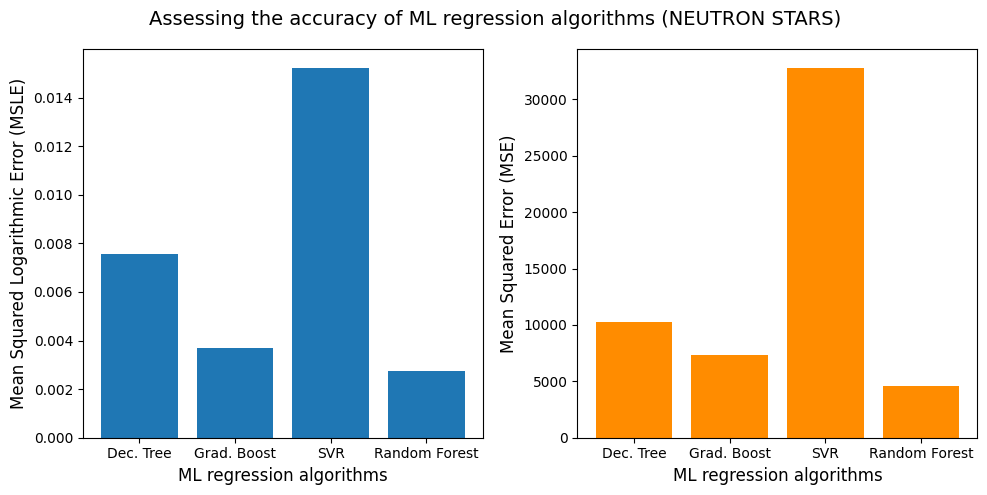

In [44]:
# Metrics results for Neutron Stars (polytropic)
fig_metrics_NS_avg,axes_metrics_NS_avg = plt.subplots(1,2,figsize=(10,5))
ML_reg_algorithms_names = ["Dec. Tree","Grad. Boost","SVR","Random Forest"]

# Summarizing the MSLE and MSE results in lists
MSLE_avg_results_NS = [MSLE_dtree_NS_avg,MSLE_gradboost_NS_avg,MSLE_SVR_NS_avg,MSLE_RF_NS_avg]
MSE_avg_results_NS = [MSE_dtree_NS_avg,MSE_gradboost_NS_avg,MSE_SVR_NS_avg,MSE_RF_NS_avg]

# Plotting the MSLE (uniform average results)
axes_metrics_NS_avg[0].bar(ML_reg_algorithms_names,MSLE_avg_results_NS)
axes_metrics_NS_avg[0].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_NS_avg[0].set_ylabel("Mean Squared Logarithmic Error (MSLE)",fontsize=12)

# Plotting the MSE (uniform average results)
axes_metrics_NS_avg[1].bar(ML_reg_algorithms_names,MSE_avg_results_NS,color="darkorange")
axes_metrics_NS_avg[1].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_NS_avg[1].set_ylabel("Mean Squared Error (MSE)",fontsize=12)

fig_metrics_NS_avg.suptitle("Assessing the accuracy of ML regression algorithms (NEUTRON STARS)",fontsize=14)
fig_metrics_NS_avg.tight_layout()

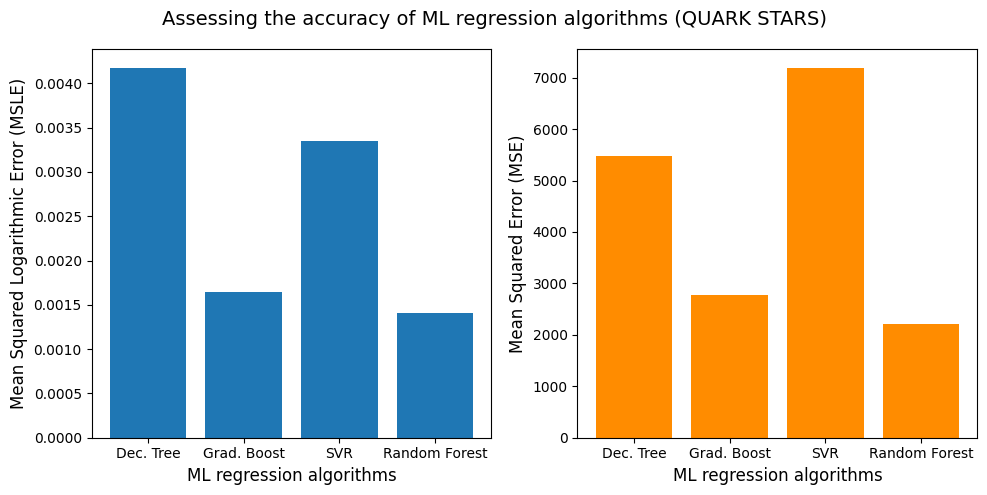

In [45]:
# Metrics results for Quark Stars (cfl)
fig_metrics_QS_avg,axes_metrics_QS_avg = plt.subplots(1,2,figsize=(10,5))
ML_reg_algorithms_names = ["Dec. Tree","Grad. Boost","SVR","Random Forest"]

# Summarizing the MSLE and MSE results in lists
MSLE_avg_results_QS = [MSLE_dtree_QS_avg,MSLE_gradboost_QS_avg,MSLE_SVR_QS_avg,MSLE_RF_QS_avg]
MSE_avg_results_QS = [MSE_dtree_QS_avg,MSE_gradboost_QS_avg,MSE_SVR_QS_avg,MSE_RF_QS_avg]

# Plotting the MSLE (uniform average results)
axes_metrics_QS_avg[0].bar(ML_reg_algorithms_names,MSLE_avg_results_QS)
axes_metrics_QS_avg[0].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_QS_avg[0].set_ylabel("Mean Squared Logarithmic Error (MSLE)",fontsize=12)

# Plotting the MSE (uniform average results)
axes_metrics_QS_avg[1].bar(ML_reg_algorithms_names,MSE_avg_results_QS,color="darkorange")
axes_metrics_QS_avg[1].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_QS_avg[1].set_ylabel("Mean Squared Error (MSE)",fontsize=12)

fig_metrics_QS_avg.suptitle("Assessing the accuracy of ML regression algorithms (QUARK STARS)",fontsize=14)
fig_metrics_QS_avg.tight_layout()

### **3.3 Plotting true and prediceted values**

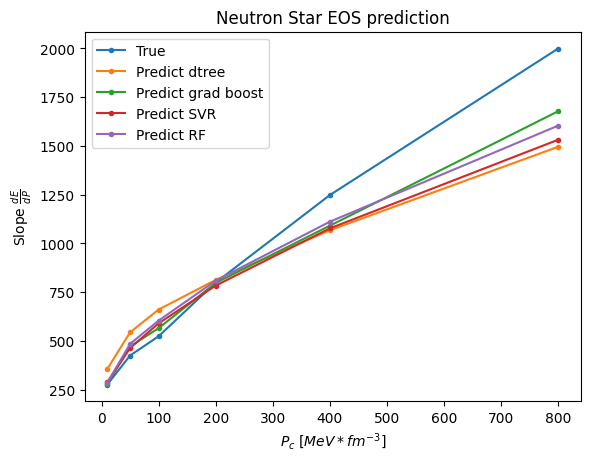

In [56]:
plt.plot([10,50,100,200,400,800],NS_EOS_regY_test.iloc[1500],".-",label="True")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_dtree[1500],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_gradboost[1500],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_SVR[1500],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_RF[1500],".-",label="Predict RF")
plt.title("Neutron Star EOS prediction")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()

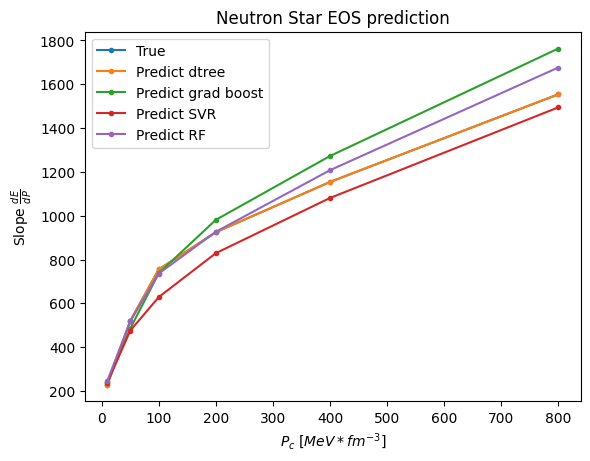

In [55]:
plt.plot([10,50,100,200,400,800],NS_EOS_regY_test.iloc[2000],".-",label="True")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_dtree[2000],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_gradboost[2000],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_SVR[2000],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_RF[2000],".-",label="Predict RF")
plt.title("Neutron Star EOS prediction")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()

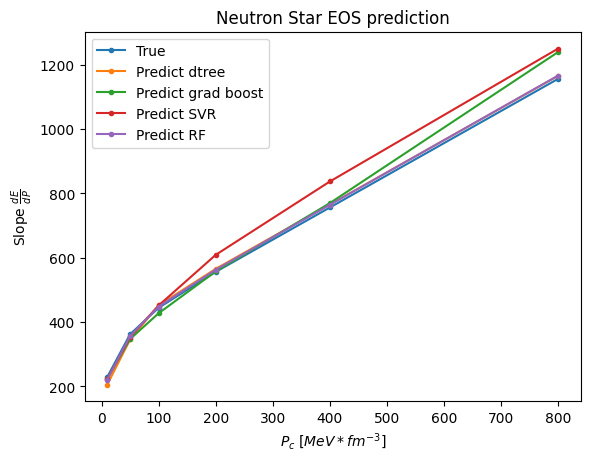

In [54]:
plt.plot([10,50,100,200,400,800],NS_EOS_regY_test.iloc[200],".-",label="True")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_dtree[200],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_gradboost[200],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_SVR[200],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_RF[200],".-",label="Predict RF")
plt.title("Neutron Star EOS prediction")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()

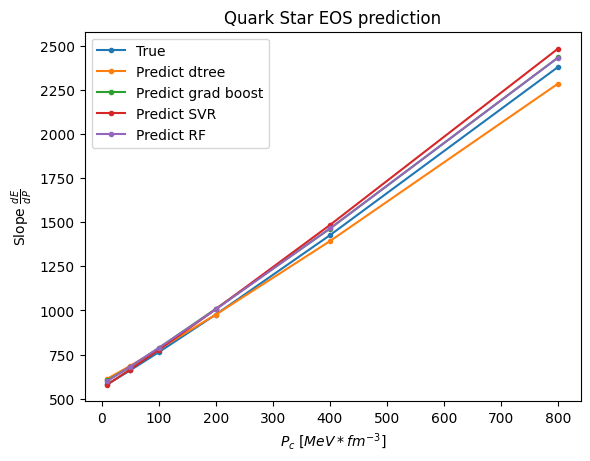

In [53]:
plt.plot([10,50,100,200,400,800],QS_EOS_regY_test.iloc[2111],".-",label="True")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_dtree[2111],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_gradboost[2111],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_SVR[2111],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_RF[2111],".-",label="Predict RF")
plt.title("Quark Star EOS prediction")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()

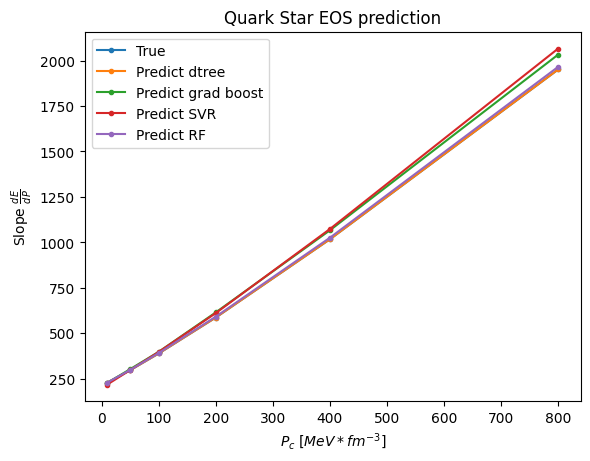

In [52]:
plt.plot([10,50,100,200,400,800],QS_EOS_regY_test.iloc[11],".-",label="True")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_dtree[11],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_gradboost[11],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_SVR[11],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_RF[11],".-",label="Predict RF")
plt.title("Quark Star EOS prediction")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()